In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
path = '/Users/Silence_gc.q/Downloads/shopify.csv'
df = pd.read_csv(path)
df['time'] = pd.to_datetime(df['created_at'])
df = df.drop('created_at', axis = 1)
df = df.sort_values(by='time',ascending=True)
df= df.reset_index()
del df['index']
df

,shop_id,user_id,order_amount,total_items,payment_method,time
0,39,738,536,4,cash,2017-03-01 00:08:00
1,39,910,268,2,cash,2017-03-01 00:10:00
2,97,912,324,2,cash,2017-03-01 00:14:00
3,80,798,290,2,credit_card,2017-03-01 00:19:00
4,49,799,258,2,credit_card,2017-03-01 00:22:00
...,...,...,...,...,...,...
4995,53,940,112,1,credit_card,2017-03-30 23:12:00
4996,34,818,244,2,cash,2017-03-30 23:16:00
4997,21,815,142,1,cash,2017-03-30 23:26:00
4998,52,848,292,2,cash,2017-03-30 23:41:00


In [117]:
df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


[Text(0, 0, '1830'),
 Text(0, 0, '1832'),
 Text(0, 0, '941'),
 Text(0, 0, '293'),
 Text(0, 0, '77'),
 Text(0, 0, '9'),
 Text(0, 0, '1'),
 Text(0, 0, '17')]

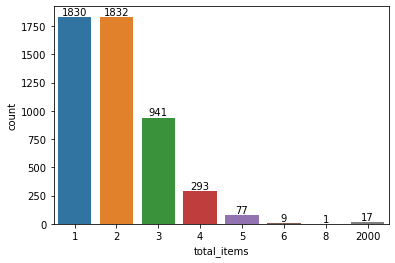

In [133]:
ax = sns.countplot(x="total_items",data=df)
ax.bar_label(ax.containers[0])

In [134]:
df[df['total_items']==2000]

,shop_id,user_id,order_amount,total_items,payment_method,time
209,42,607,704000,2000,credit_card,2017-03-02 04:00:00
210,42,607,704000,2000,credit_card,2017-03-02 04:00:00
554,42,607,704000,2000,credit_card,2017-03-04 04:00:00
1035,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1036,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1757,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1912,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2380,42,607,704000,2000,credit_card,2017-03-15 04:00:00
2673,42,607,704000,2000,credit_card,2017-03-17 04:00:00
3045,42,607,704000,2000,credit_card,2017-03-19 04:00:00


1.a      
By looking at the basic statistics and graph of the dataset, I found that the max of order_amount and total_items is extremely high, which might be outliers that can skew the reality.Indeed, there are 17 orders have 2000 items sold, making order_amount very high. It means that if we simply calculate AOV using order_amount / number of orders, the number we will get is skewd. 

There are two ways to fix this issue. 
First, since people normally don't buy lots of identical sneakers at the same time, we can take 10 as a threshold to classify buyers: a buyer buys more than 10 pairs of sneakers will be considered as business account, and the rest are individual account. Then we calculate AOV for both types of account. This will generate a number that makes more sense.

Second, disregard this metric and find a new working metric, such as average of each store's order amount or total items

In [144]:
new_df = df[df['total_items'] < 10]
new_AOV = new_df['order_amount'].sum()/len(new_df)
new_AOV
# this number makes much more sense than the original one

754.0919125025085

In [160]:
df.groupby(['shop_id']).mean()[['order_amount', 'total_items']]

,order_amount,total_items
shop_id,,
1,308.818182,1.954545
2,174.327273,1.854545
3,305.250000,2.062500
4,258.509804,2.019608
5,290.311111,2.044444
...,...,...
96,330.000000,2.156863
97,324.000000,2.000000
98,245.362069,1.844828


1.b     
I will use average of order_amount for each store as a metric to report for this dataset. 

1.c     
It can tell us how do the store perform, and we can later allocate our resources based on such information to achieve higher return. 

In [162]:
2.a
SELECT 
	COUNT(CASE WHEN ShipperID = 3 then 1 else null end) as 'count'
FROM Orders

value: 68


2.b
with emp_order as (
	SELECT 
    	COUNT(o.OrderID) as cnt,
        o.EmployeeID,
        e.LastName
   	FROM 
    	Orders as o
    LEFT JOIN Employees as e ON e.EmployeeID = o.EmployeeID
    GROUP BY o.EmployeeID, e.LastName
    ORDER BY cnt DESC    	
)
SELECT LastName FROM emp_order
LIMIT 1

value: Peacock


2.c
#I made an assumption in this question: It asks what product was ordered the most by customers in Germany, 
#I assumed we are going to use quantity sold instead of count number of orders. 
#If not using quantity, it will change the SUM(Quantity) to COUNT(OrderDetailsID) to find the answer. 


with new_table as
(
SELECT
d.OrderDetailID, 
d.Quantity, 
o.OrderID, 
o.CustomerID,
p.ProductName
FROM 
OrderDetails as d
LEFT JOIN Orders as o ON d.OrderID = o.OrderID
LEFT JOIN Customers as c ON o.CustomerID = c.CustomerID
LEFT JOIN Products as p ON d.ProductID = p.ProductID
WHERE
c.Country = 'Germany'
)
SELECT
ProductName
FROM(
SELECT 
ProductName, 
SUM(Quantity) as qtt
FROM new_table
GROUP BY ProductName
ORDER BY qtt DESC
)
LIMIT 1

value: Boston Crab Meat or Gorgonzola Telino depending on our filtering logic

SyntaxError: invalid syntax (2636348849.py, line 1)